In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import cryptoz
from cryptoz import stats
import pandas as pd
import numpy as np

# data

In [2]:
from_dt = cryptoz.data.ago_dt(days=3)
to_dt = cryptoz.data.now_dt()
period = cryptoz.data.Period.M5

In [3]:
ohlc = cryptoz.data.chartdata('(USDT_+)', from_dt, to_dt, period)

   count         mean          std     min        25%       50%         75%  \
0  876.0  1228.719283  3077.136884  0.0881  20.562613  144.5619  544.485117   

       max  
0  11770.0  


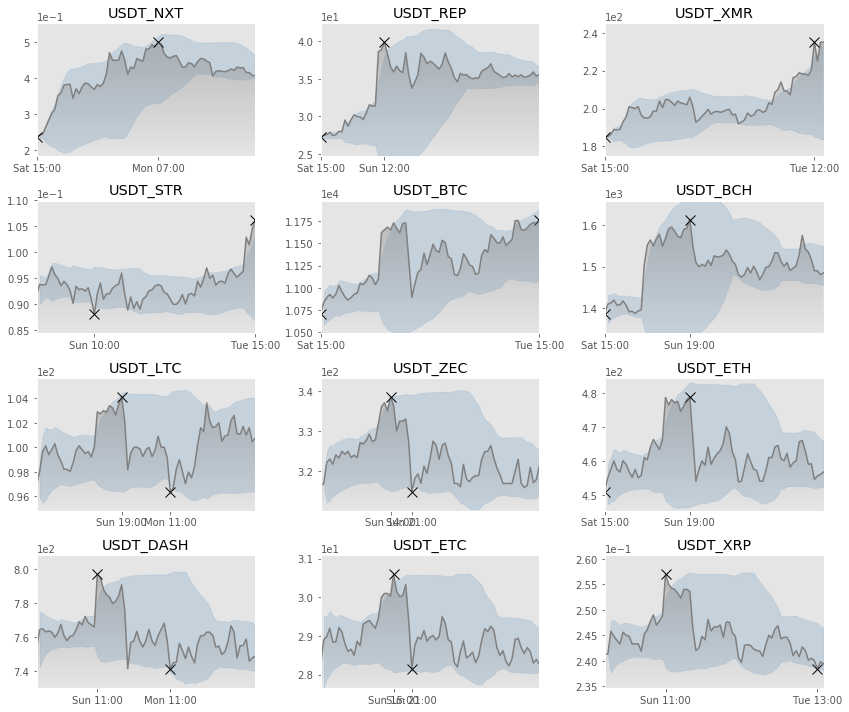

In [4]:
reload(cryptoz.plot)
df = cryptoz.utils.to_df(ohlc, 'C').resample('1h').last()
sma = df.rolling(30, min_periods=1).mean()
sms = df.rolling(30, min_periods=1).std()
bands = (sma + 2 * sms, sma - 2 * sms)
ranker = lambda sr: 1 - sr.iloc[-1] / sr.min()

cryptoz.plot.timesr_matrix(df, bands=bands, ranker=ranker)

     count      mean       std       min       25%  50%       75%       max
0  10368.0  0.000152  0.006988 -0.072595 -0.002458  0.0  0.002831  0.093333


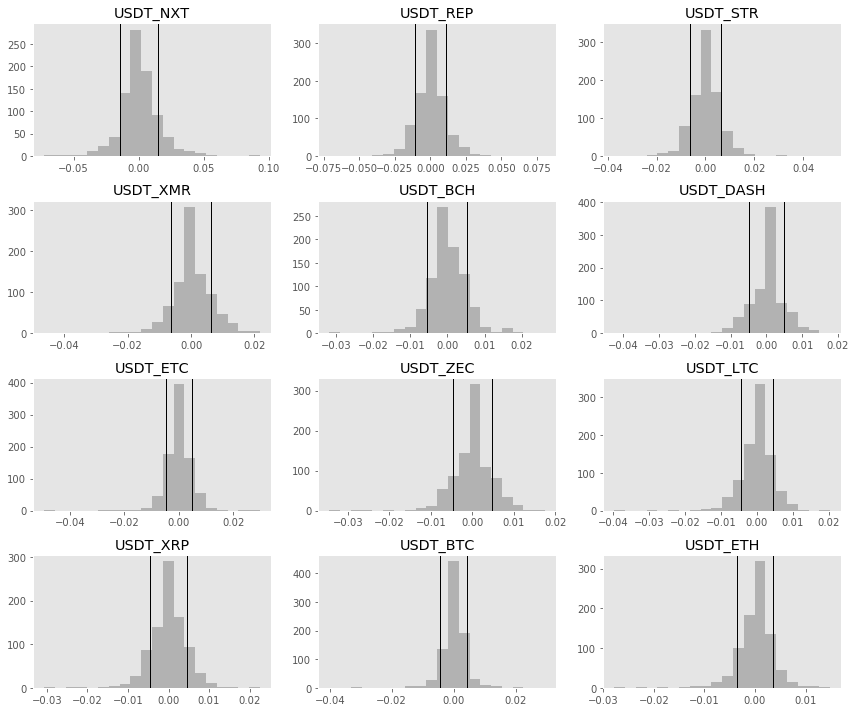

In [5]:
df = cryptoz.utils.to_df(ohlc, 'C').pct_change().fillna(0)

ranker = lambda sr: 1 / sr.std()
axvlines = [lambda sr: -sr.std(), lambda sr: sr.std()]
cryptoz.plot.hist_matrix(df, axvlines=axvlines, ranker=ranker)

# recovery

In [6]:
df = stats.recovery.dd(ohlc)

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,864.0,-0.051578,0.029593,-0.118972,-0.077538,-0.060208,-0.022566,-0.000717
USDT_BTC,864.0,-0.027434,0.021053,-0.116720,-0.041314,-0.021475,-0.009833,-0.001114
USDT_DASH,863.0,-0.047732,0.026921,-0.103714,-0.068425,-0.059358,-0.017219,0.000000
USDT_ETC,864.0,-0.050003,0.028858,-0.109744,-0.075753,-0.061185,-0.018125,-0.003157
USDT_ETH,864.0,-0.033733,0.021027,-0.088915,-0.050362,-0.041189,-0.011968,-0.000642
USDT_LTC,864.0,-0.043596,0.026517,-0.116541,-0.062193,-0.045356,-0.016116,-0.001201
USDT_NXT,864.0,-0.106849,0.053664,-0.222702,-0.155260,-0.102231,-0.066430,-0.000560
USDT_REP,864.0,-0.188214,0.100967,-0.310056,-0.259638,-0.241822,-0.058010,0.000000
USDT_STR,864.0,-0.052838,0.024496,-0.124025,-0.072079,-0.052725,-0.032355,-0.001216
USDT_XMR,864.0,-0.032952,0.020504,-0.109039,-0.048549,-0.030433,-0.015945,0.000000


In [7]:
stats.recovery.dd_now(ohlc)

USDT_REP    -0.255697
USDT_NXT    -0.200945
USDT_BCH    -0.086154
USDT_ETC    -0.084752
USDT_XRP    -0.078469
USDT_DASH   -0.074133
USDT_ZEC    -0.057522
USDT_ETH    -0.054256
USDT_LTC    -0.053102
USDT_XMR    -0.014100
USDT_BTC    -0.008174
USDT_STR    -0.006663
dtype: float64

   count      mean       std       min       25%       50%       75%       max
0  876.0 -0.060112  0.058581 -0.298496 -0.071628 -0.049837 -0.018687 -0.002283


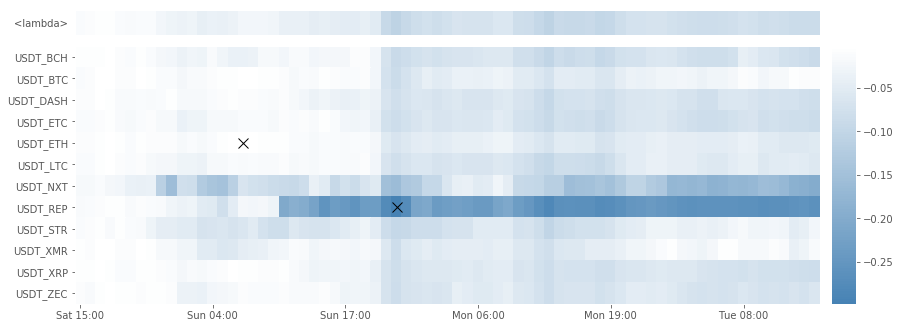

In [8]:
df = stats.recovery.resample_dd(ohlc, lambda df: df.mean(), '1h')

cmap = cryptoz.plot.continuous_cmap(['steelblue', 'white'])
cryptoz.plot.evolution(df, cmap=cmap)

In [9]:
stats.recovery.maxdd_duration(ohlc)

USDT_NXT    0 days 01:00:00
USDT_XMR    0 days 01:40:00
USDT_BTC    0 days 01:45:00
USDT_ETC    0 days 05:50:00
USDT_ZEC    0 days 09:25:00
USDT_ETH    0 days 10:00:00
USDT_DASH   0 days 10:05:00
USDT_XRP    0 days 10:05:00
USDT_REP    0 days 11:05:00
USDT_BCH    0 days 16:45:00
USDT_LTC    0 days 17:00:00
USDT_STR    1 days 01:05:00
dtype: timedelta64[ns]

In [10]:
df = cryptoz.utils.to_df(stats.recovery.details(ohlc), 'dd_len')

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,13.0,26.000000,53.901144,1.0,2.00,9.0,23.00,201.0
USDT_BTC,18.0,9.777778,12.100343,1.0,2.00,3.5,15.75,35.0
USDT_DASH,10.0,21.200000,37.817691,1.0,1.25,3.5,21.75,121.0
USDT_ETC,10.0,20.200000,29.921378,1.0,2.00,5.0,22.00,80.0
USDT_ETH,14.0,17.142857,35.307130,1.0,1.25,3.0,4.00,120.0
USDT_LTC,10.0,31.100000,62.962864,1.0,1.00,4.5,22.75,204.0
USDT_NXT,17.0,19.294118,62.463754,1.0,1.00,2.0,5.00,261.0
USDT_REP,18.0,12.166667,31.241469,1.0,1.00,1.5,4.75,133.0
USDT_STR,6.0,56.500000,119.867844,1.0,5.25,9.5,13.00,301.0
USDT_XMR,22.0,10.681818,15.273339,1.0,1.00,4.0,12.50,56.0


# corr

   count     mean       std       min       25%       50%       75%  max
0  144.0  0.47551  0.361414 -0.155991  0.158865  0.518541  0.775029  1.0


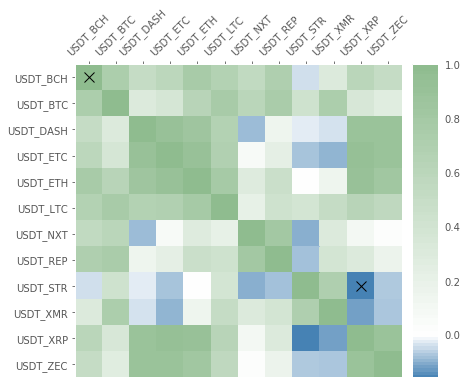

In [11]:
df = stats.corr.corr(cryptoz.utils.to_df(ohlc, 'C'))

cmap = cryptoz.plot.continuous_cmap(['steelblue', 'white', 'darkseagreen'])
norm = cryptoz.plot.midpoint_norm(0)
cryptoz.plot.heatmap(df, cmap=cmap, norm=norm)

   count      mean      std       min      25%      50%       75%       max
0  730.0  0.400277  0.41772 -0.896911  0.12918  0.45925  0.749322  0.993005


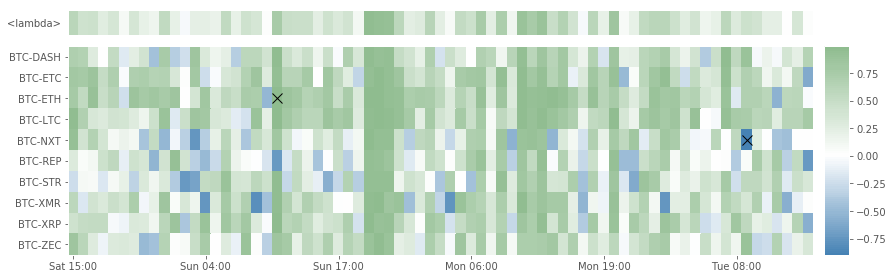

In [12]:
import re

df = cryptoz.utils.to_df(ohlc, 'C')
df = stats.corr.resample_corr(df, '1h')
regex = re.compile('(USDT_BTC-+)')
df = df[list(filter(regex.search, df.columns))]
df.columns = list(map(lambda x: re.sub(r'(USDT_)', '', x), df.columns))

cryptoz.plot.evolution(df, cmap=cmap, norm=norm)

# depth

    count          mean            std            min            25%  \
0  2400.0 -36585.129018  146309.264814 -541392.605072 -137402.005971   

        50%          75%            max  
0  0.028829  63174.49764  285084.643007  


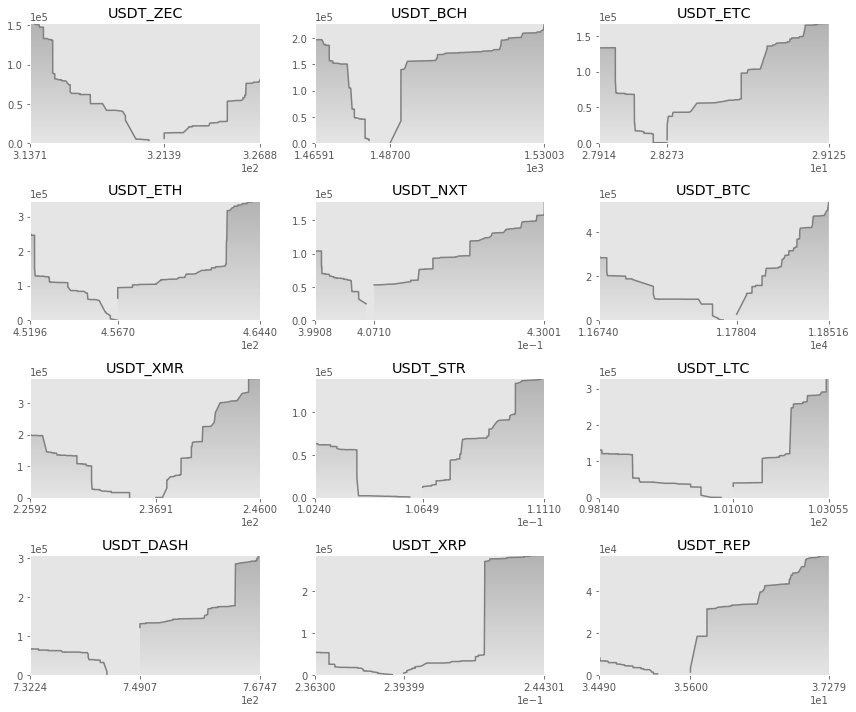

In [13]:
orderbooks = cryptoz.data.orderbooks('(USDT_+)')

cryptoz.plot.depth(orderbooks, ranker=lambda sr: 1 - sr.max() / abs(sr.min()))

# score

In [14]:
def BB_bands(sr, window, std_n):
    rollmean_sr = sr.rolling(window=window, min_periods=1).mean()
    rollstd_sr = sr.rolling(window=window, min_periods=1).std()
    upper_band_sr = rollmean_sr + std_n * rollstd_sr
    lower_band_sr = rollmean_sr - std_n * rollstd_sr
    return upper_band_sr, lower_band_sr

def corridor(sr1, sr2):
    return sr1 - sr2

def normalize(sr):
    return (sr - sr.mean()) / sr.std()

   count      mean       std   min       25%       50%       75%   max
0  756.0 -0.271278  8.974937 -12.0 -9.439752 -0.785545  9.481661  12.0


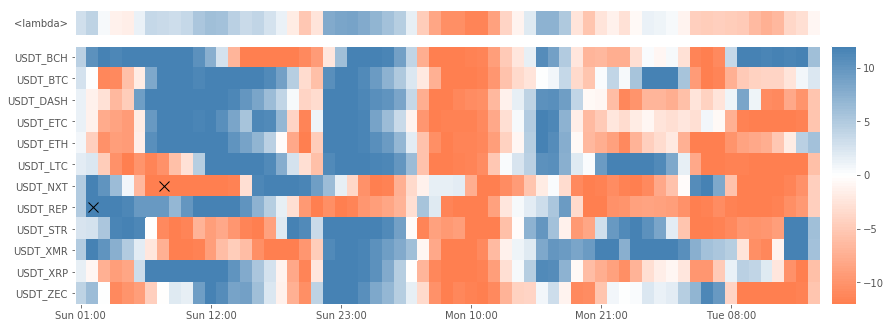

In [15]:
window = 120
std_n = 3

strategy = lambda ohlc_df: normalize(corridor(*BB_bands(ohlc_df['C'], window, 3)))
df1 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score1_df = cryptoz.score.rolling_apply(df1, window=window, min_periods=window)
score1_df.dropna(inplace=True)

cmap = cryptoz.plot.continuous_cmap(['coral', 'white', 'steelblue'])
norm = cryptoz.plot.midpoint_norm(0)
cryptoz.plot.evolution(score1_df.resample('1h').sum(), cmap=cmap, norm=norm)

   count      mean       std        min       25%      50%       75%  \
0  756.0  0.469554  6.547669 -11.735495 -5.154109  0.82338  5.979292   

         max  
0  11.784201  


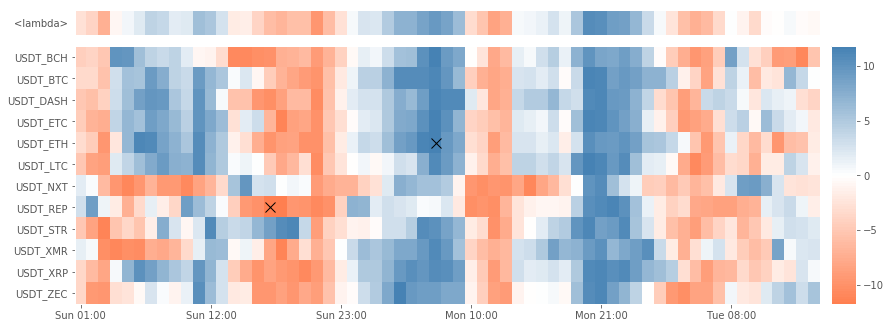

In [16]:
strategy = lambda ohlc_df: normalize(corridor(ohlc_df['C'], ohlc_df['C'].rolling(window=window, min_periods=1).mean()))
df2 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score2_df = cryptoz.score.rolling_apply(df2, window=window, min_periods=window)
score2_df.dropna(inplace=True)

cryptoz.plot.evolution(score2_df.resample('1h').sum(), cmap=cmap, norm=norm)

Rules
1. narrow corridor and price over MA -> trend up -> buy
2. wide corridor and price below MA -> oversold -> buy
3. narrow corridor and price below MA -> trend down -> sell
4. wide corridor and price above MA -> overbought -> sell

   count     mean       std        min       25%       50%       75%  \
0  756.0 -2.82873  5.684715 -11.542823 -7.584727 -3.856288  1.032266   

         max  
0  11.600157  


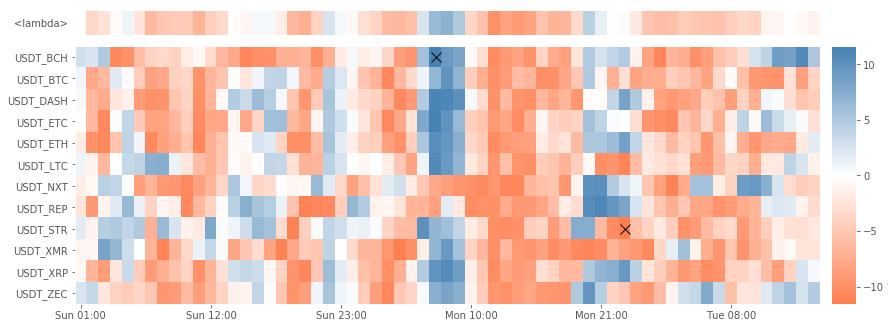

In [17]:
score_df = cryptoz.score.diff(score1_df, score2_df, axis=0) # axis 0: pair-local score
score_df.dropna(inplace=True)

cryptoz.plot.evolution(score_df.resample('1h').sum(), cmap=cmap, norm=norm)

# perf

   count      mean       std  min       25%       50%      75%  max
0  192.0 -0.264538  0.736179 -1.0 -0.924742 -0.616721  0.40915  1.0


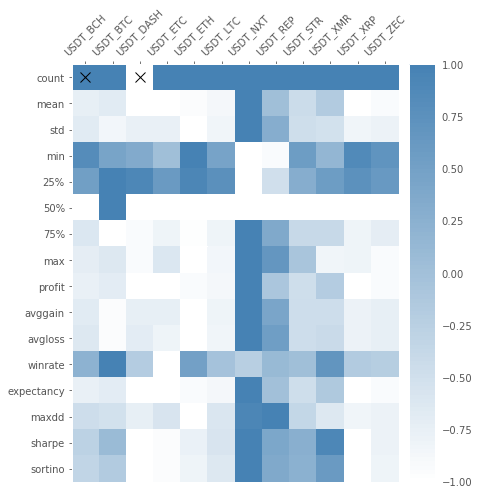

In [18]:
df = stats.perf.score_matrix(ohlc)

cmap = cryptoz.plot.continuous_cmap(['white', 'steelblue'])
cryptoz.plot.heatmap(df, cmap=cmap)